In [1]:
import numpy as np
import pandas as pd
import os
import gdal
import subprocess
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from osgeo import ogr
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import utm
from rasterstats import zonal_stats
import rasterio
from rasterio.mask import mask
from rasterio.plot import show

### This is the cell with all the required file paths- 11 so far

In [2]:
# automate with more sites later
# srtm full path 
srtm = "/data/mangrove-data/Kathy/biomass_project/sites/srtm/srtm_baja.tif"
CH_srtm = "/data/mangrove-data/Kathy/biomass_project/sites/srtm/srtm_CH_baja.tif"

# DEM full path
# lap_6_2018_dem = "/data/mangrove-data/master/2018.07-mexico-lapaz/lap-2018-07-site6/output/lap_2018-07_site06_120m_DEM_tc.tif"
lap_1_2018_dem = "/data/mangrove-data/master/2018.07-mexico-lapaz/lap-2018-07-site1/dem/lap_2018-07_site1_120m_DEM_tc.tif"
# ptsc_9_2018_dem = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18_site9/site-9-dem-tc.tif"
lap_4_2018_dem = "/data/mangrove-data/master/2018.07-mexico-lapaz/lap-2018-07-site4/output/lap_2018-07_site04_120m_DEM_tc.tif"
ptsc_3_2018_dem = "/data/mangrove-data/master/2018.05-mexico-ptosancarlos/psc-2018-05-site03/output/psc_2018-05_site03_120m_DEM_tc.tif"
ptsc_4_2018_dem = "/data/mangrove-data/master/2018.05-mexico-ptosancarlos/psc-2018-05-site04/output/psc_2018-05_site04_120m_DEM_tc.tif"
ptsc_1_2018_dem = "/data/mangrove-data/master/2018.05-mexico-ptosancarlos/psc-2018-05-site01/output/psc_2018-05_site01_120m_DEM_tc.tif"
ptsc_8_072018_dem = "/data/mangrove-data/master/2018.07-mexico-ptosancarlos/psc_2018-07_site08/output/psc_2018-07_site08_120m_DEM-tc.tif"
ptsc_11_052018_dem = "/data/mangrove-data/master/2018.05-mexico-ptosancarlos/psc-2018-05-site10-11/output/psc_2018-05_site11_120m_DEM_tc.tif"
ptsc_1314_2018_dem = "/data/mangrove-data/master/2018.05-mexico-ptosancarlos/psc-2018-05-site13-14/output/psc_2018-05_site13-14_120m_DEM_tc.tif"
ptsc_12_2018_dem = "/data/mangrove-data/master/2018.05-mexico-ptosancarlos/psc-2018-05-site12/output/psc_2018-05_site12_120m_DEM_tc.tif"
ptsc_11_072018_dem = "/data/mangrove-data/master/2018.07-mexico-ptosancarlos/psc_2018-07_site11/output/psc_2018-07_site11_120m_DEM_tc.tif"
lap_5_2018_dem = "/data/mangrove-data/master/2018.07-mexico-lapaz/lap-2018-07-site5/output/lap_2019-07_site05_120m_DEM_tc.tif"

#lap_6_2018_dem, 
# list of dems 
dem_names = [lap_1_2018_dem, lap_4_2018_dem, ptsc_3_2018_dem, ptsc_4_2018_dem,
            ptsc_8_072018_dem, ptsc_11_052018_dem, ptsc_1314_2018_dem, ptsc_12_2018_dem, 
            ptsc_11_072018_dem, lap_5_2018_dem]

# Mangrove shapefile- manually made
#lap6_2018_label = "/data/mangrove-data/Kathy/biomass_project/sites/lap_07-18_site6/label_1.gpkg"
lap1_2018_label = "/data/mangrove-data/Kathy/biomass_project/sites/lap_07-18_site1/Labels_1.gpkg"
ptsc_9_2018_label = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18_site9/label_1.gpkg"
lap4_2018_label = "/data/mangrove-data/Kathy/biomass_project/sites/lap_07-18_site4/label_1.gpkg"
ptsc3_2018_label = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18-site3-4/label_1.gpkg"
ptsc4_2018_label = ptsc3_2018_label
ptsc1_2018_label = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18_site1/label_1.gpkg"
ptsc_8_072018_label = "/data/mangrove-data/Kathy/biomass_project/sites/psc_07-18_site8/label_1.gpkg"
ptsc_11_052018_label = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18_site11/label_1.gpkg"
ptsc_1314_2018_label = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18_site13-14/label_1_1.gpkg"
ptsc_12_2018_label = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18_site12/Label_1.gpkg"
ptsc_11_072018_label = "/data/mangrove-data/Kathy/biomass_project/sites/psc_07-18_site11/label_1.gpkg"
lap_5_2018_label = "/data/mangrove-data/Kathy/biomass_project/sites/lap_07-18_site5/label_1.gpkg"

#lap6_2018_label, 
# list of manual labels
label_names = [lap1_2018_label, lap4_2018_label, ptsc3_2018_label, 
               ptsc4_2018_label, ptsc_8_072018_label, ptsc_11_052018_label, 
               ptsc_1314_2018_label, ptsc_12_2018_label, ptsc_11_072018_label, 
               lap_5_2018_label]

# Mangrove-Nonmangrove shapefile- manually made
#lap6_2018_shp = "/data/mangrove-data/master/2018.07-mexico-lapaz/lap-2018-07-site6/labels/lap_2018-07_site06_120m_RGB_m-nm.shp"
lap1_2018_shp = "/data/mangrove-data/Kathy/biomass_project/sites/lap_07-18_site1/lap_2018-07_site01_labels_m-nm/lap_2018-07_site01_labels_m-nm.shp"
#ptsc_9_2018_shp = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18_site9/psc_2018-05_site_09_labels_m-nm_final/psc_2018-05_site_09_labels_m-nm_final.shp"
lap4_2018_shp = "/data/mangrove-data/Kathy/biomass_project/sites/lap_07-18_site4/lap_2018-07_site04_labels_m-nm/lap_2018-07_site04_labels_m-nm.shp"
ptsc3_2018_shp = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18-site3-4/2018-05_psc_site03-04_120m_labels_m-nm/2018-05_psc_site03-04_120m_labels_m-nm.shp"
ptsc4_2018_shp = ptsc3_2018_shp
ptsc1_2018_shp = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18_site1/psc_2018-05_site01_fixed_labels_m-nm.gpkg"
ptsc_8_072018_shp = "/data/mangrove-data/Kathy/biomass_project/sites/psc_07-18_site8/psc_2018-07_site08_120m_RGB_labels_m-nm/psc_2018-07_site08_120m_RGB_labels_m-nm.shp"
ptsc_11_052018_shp = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18_site11/drive-download-20200511T062534Z-001/psc_2018-05_site11_120m_RGB_dissolved.shp"
ptsc_1314_2018_shp = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18_site13-14/psc_2018_05_site1314_fixed_mnm.gpkg"
ptsc_12_2018_shp = "/data/mangrove-data/Kathy/biomass_project/sites/psc_05-18_site12/psc_2018-05_site12_labels_m-nm/psc_2018-05_site12_labels_m-nm.shp"
ptsc_11_072018_shp = "/data/mangrove-data/Kathy/biomass_project/sites/psc_07-18_site11/psc_2018-07_site11_120m_RGB_m-nm/psc_2018-07_site11_120m_RGB_m-nm.shp"
lap_5_2018_shp = "/data/mangrove-data/Kathy/biomass_project/sits/lap_07-18_site5/psc_2018-07_site05_fixed_mnm.gpkg"


# lap6_2018_shp, 
# list of manual shps
shp_names = [lap1_2018_shp, lap4_2018_shp, ptsc3_2018_shp, ptsc4_2018_shp,
            ptsc_8_072018_shp, ptsc_11_052018_shp, ptsc_1314_2018_shp, ptsc_12_2018_shp, 
            ptsc_11_072018_shp, lap_5_2018_shp]

#"lap-2018-07-site6", 
# list of site names
site_names_down = ["lap_07-18_site1", "lap_07-18_site4", "psc_05-18_site3", "psc_07-18_site8", 
                   "psc_05-18_site11", "psc_05-18_site1314", "psc_05-18_site12", "psc_07-18_site11", "lap_07-18_site5"]

# these are wrong- i think, im not sure actually
site_names_label = ["lap_2018-07_site01_labels", "lap_2018-07_site04", "psc_2018-05_site03_labels",
                    "psc_2018-07_site08", "psc_2018-05_site11", "psc_2018-05_site13-14", 
                    "psc_2018-05_site12", "psc_2018-07_site11", "lap_2018-07_site05"]

In [81]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    feats=[]
    for feat in json.loads(soil.to_json())['features']:
        feats.append(feat['geometry'])
    return feats

In [82]:
def split_vector_wsm(site_name_down, site_name_label):
    # helper for splitting up vectors by class
    basedir_down = '/data/mangrove-data/Kathy/biomass_project/downsampling'
    basedir_poly = '/data/mangrove-data/Kathy/biomass_project/sites'
    # first check if water-soil-mangrove folder exists
    if not os.path.exists(f'{basedir_down}/{site_name_down}/water-soil-mangrove/'):
        os.makedirs(f'{basedir_down}/{site_name_down}/water-soil-mangrove/')
    
    # check if files already exist, by just checking soil file for now
    if os.path.exists(f'{basedir_down}/{site_name_down}/water-soil-mangrove/class_soil.gpkg'):
        print(f'{site_name_down} exists')
        return
        
    # soil
    polygons = gpd.read_file(f"{basedir_poly}/{site_name_down}/{site_name_label}_m-nm_water-soil/{site_name_label}_m-nm_water-soil.shp")
    soil = polygons[polygons['class']=='soil']
    soil.crs = {'init': 'epsg:4326'}
    soil.to_file(f'{basedir_down}/{site_name_down}/water-soil-mangrove/class_soil.gpkg', driver="GPKG")

    # water
    polygons = gpd.read_file(f"{basedir_poly}/{site_name_down}/{site_name_label}_m-nm_water-soil/{site_name_label}_m-nm_water-soil.shp")
    water = polygons[polygons['class']=='water']
    water.crs = {'init': 'epsg:4326'}
    water.to_file(f'{basedir_down}/{site_name_down}/water-soil-mangrove/class_water.gpkg', driver="GPKG")

    # mangrove
    polygons = gpd.read_file(f"{basedir_poly}/{site_name_down}/{site_name_label}_m-nm_water-soil/{site_name_label}_m-nm_water-soil.shp")
    mangrove = polygons[polygons['class']=='mangrove']
    mangrove.crs = {'init': 'epsg:4326'}
    mangrove.to_file(f'{basedir_down}/{site_name_down}/water-soil-mangrove/class_mangrove.gpkg', driver="GPKG")
    
    # status update
    print(f'finished {site_name_down}')

In [83]:
# loop through sites and split vectors
count = 0
for site in site_names_down:
    split_vector_wsm(site_names_down[count], site_names_label[count])
    count += 1

lap_07-18_site1 exists


ValueError: Cannot write empty DataFrame to file.

In [18]:
# helper definition split up shapefiles
lap_1_2018_dem = "/data/mangrove-data/master/2018.07-mexico-lapaz/lap-2018-07-site1/dem/lap_2018-07_site1_120m_DEM_tc.tif"
data = rasterio.open(lap_1_2018_dem)
wsm_site1_label = "/data/mangrove-data/Kathy/biomass_project/sites/lap_07-18_site1/lap_2018-07_site01_labels_m-nm_water-soil/lap_2018-07_site01_labels_m-nm_water-soil.shp"
polygons = gpd.read_file("/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/soil_tiles.gpkg")
soil = polygons[polygons['class']=='soil']

soil = getFeatures(soil)
out_img, out_transform = mask(dataset=data, shapes=soil, crop=True)
# copy metadata over
out_meta = data.meta
print(out_meta)
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                })
with rasterio.open("/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/test_mask.tif", "w", **out_meta) as dest:
    dest.write(out_img)


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -32767.0, 'width': 30391, 'height': 35019, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(3.231920000000841e-07, 0.0, -110.439620208472,
       0.0, -2.9650400000000306e-07, 24.1791485538949)}


In [176]:
# Open with read update
soils = rasterio.open("/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/test_mask.tif",mode="r+")
# make mask for nodata vals for zonal stats later
soils.write_mask(True)


In [31]:
# get water, soil, mangrove label
water = gpd.read_file("/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/water_tiles.gpkg")


soil = gpd.read_file("/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/soil_tiles.gpkg")


mangrove = gpd.read_file("/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/mangrove_tiles.gpkg")
mangrove

,class,FID_2,geometry
0,mangrove,0,"MULTIPOLYGON (((-110.43775 24.17713, -110.4377..."
1,mangrove,7,"MULTIPOLYGON (((-110.43749 24.17526, -110.4374..."
2,mangrove,10,"MULTIPOLYGON (((-110.43766 24.17430, -110.4376..."
3,mangrove,11,"MULTIPOLYGON (((-110.43765 24.17427, -110.4376..."
4,mangrove,26,"MULTIPOLYGON (((-110.43740 24.17709, -110.4373..."
...,...,...,...
298,mangrove,526,"MULTIPOLYGON (((-110.43167 24.17547, -110.4316..."
299,mangrove,527,"MULTIPOLYGON (((-110.43173 24.17527, -110.4317..."
300,mangrove,551,"MULTIPOLYGON (((-110.43146 24.17568, -110.4314..."
301,mangrove,552,"MULTIPOLYGON (((-110.43134 24.17539, -110.4313..."


In [32]:
# helper definition to get stats per grid
def get_stats(site_name, dem, tiles):
    grid = gpd.read_file(tiles)
    # get max, min, count, mean, and std
    gdf = grid.join(pd.DataFrame(zonal_stats(vectors=grid['geometry'], 
                                            raster=dem, 
                                            stats=['max','min', 'count', 'mean', 'std'])), 
                    how='left')
    # valid = gdf[gdf['count'] > 0]
    return pd.DataFrame(gdf)

In [106]:
# mangrove
dem = "/data/mangrove-data/master/2018.07-mexico-lapaz/lap-2018-07-site1/dem/lap_2018-07_site1_120m_DEM_tc.tif"
tiles = "/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/mangrove_tiles.gpkg"
m_drone_CH = get_stats("lap_07-18_site1", dem, tiles)
m_valid_drone = m_drone_CH[m_drone_CH['min'] > 0]

In [107]:
# water
dem = "/data/mangrove-data/master/2018.07-mexico-lapaz/lap-2018-07-site1/dem/lap_2018-07_site1_120m_DEM_tc.tif"
tiles = "/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/water_tiles.gpkg"
w_drone_CH = get_stats("lap_07-18_site1", dem, tiles)
w_valid_drone = w_drone_CH[w_drone_CH['min'] > 0]

In [108]:
# soil
dem = "/data/mangrove-data/master/2018.07-mexico-lapaz/lap-2018-07-site1/dem/lap_2018-07_site1_120m_DEM_tc.tif"
tiles = "/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/soil_tiles.gpkg"
s_drone_CH = get_stats("lap_07-18_site1", dem, tiles)
s_valid_drone = s_drone_CH[s_drone_CH['min'] > 0]

In [109]:
# grid_file = f"/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/grid.shp"
# grid = gpd.read_file(grid_file)
# wsm_site1_label = "/data/mangrove-data/Kathy/biomass_project/sites/lap_07-18_site1/lap_2018-07_site01_labels_m-nm_water-soil/lap_2018-07_site01_labels_m-nm_water-soil.shp"
# polygons = gpd.read_file(wsm_site1_label)
# grids = gpd.clip(polygons, grid, keep_geom_type=False)
# grids.crs = {'init': 'epsg:4326'}
# grids.to_file("/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/test_mask.tif")
# #grids.plot(ax=ax, color="purple")

In [110]:
w_valid_drone['w_area'] = w_valid_drone['count']*0.00107
w_valid_drone = w_valid_drone.rename(columns={'min': 'w_min', 'max': 'w_max', 'mean': 'w_mean', 'std': 'w_std',
                     'area': 'w_area', 'count': 'w_count'})
w_grouped = w_valid_drone.groupby('FID_2').agg({
    'class': 'first', 
    'w_min': 'min',
    'w_max': 'max',
    'w_mean': 'mean',
    'w_area': 'sum',
    'w_count': 'sum'
}).reset_index()
w_grouped
w_valid_drone

/home/e4e/anaconda3/envs/gdal/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,class,FID_2,geometry,w_min,w_max,w_mean,w_count,w_std,w_area
0,water,158,"MULTIPOLYGON (((-110.43575 24.17667, -110.4357...",1.425801,2.901736,1.766726,26306,0.294787,28.14742
1,water,160,"MULTIPOLYGON (((-110.43596 24.17607, -110.4359...",1.387277,3.304874,1.745623,4606,0.465823,4.92842
2,water,161,"MULTIPOLYGON (((-110.43598 24.17579, -110.4359...",1.321504,3.436762,1.836660,3404,0.620928,3.64228
3,water,245,"MULTIPOLYGON (((-110.43482 24.17423, -110.4348...",1.760998,2.210015,2.078735,60,0.123315,0.06420
4,water,270,"MULTIPOLYGON (((-110.43481 24.17426, -110.4348...",0.375716,3.192855,1.890381,9569,0.543425,10.23883
...,...,...,...,...,...,...,...,...,...
232,water,526,"MULTIPOLYGON (((-110.43178 24.17561, -110.4317...",1.605414,3.267503,2.142726,31319,0.298966,33.51133
233,water,448,"MULTIPOLYGON (((-110.43269 24.17556, -110.4326...",1.765630,4.303650,2.531483,7290,0.765454,7.80030
234,water,501,"MULTIPOLYGON (((-110.43186 24.17524, -110.4318...",1.485237,1.642436,1.564080,47625,0.020007,50.95875
235,water,526,"MULTIPOLYGON (((-110.43174 24.17533, -110.4317...",1.408459,1.680476,1.535482,84762,0.029155,90.69534


In [111]:
m_valid_drone['m_area'] = m_valid_drone['count']*0.00107
m_valid_drone = m_valid_drone.rename(columns={'min': 'm_min', 'max': 'm_max', 'mean': 'm_mean', 'std': 'm_std',
                                               'area': 'm_area', 'count': 'm_count'})
m_grouped = m_valid_drone.groupby('FID_2').agg({
    'class': 'first', 
    'm_min': 'min',
    'm_max': 'max',
    'm_mean': 'mean',
    'm_area': 'sum',
    'm_count': 'sum'
}).reset_index()
m_grouped
m_valid_drone

/home/e4e/anaconda3/envs/gdal/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,class,FID_2,geometry,m_min,m_max,m_mean,m_count,m_std,m_area
0,mangrove,0,"MULTIPOLYGON (((-110.43775 24.17713, -110.4377...",0.870083,3.249431,1.529529,95791,0.333063,102.49637
1,mangrove,7,"MULTIPOLYGON (((-110.43749 24.17526, -110.4374...",1.095088,1.497829,1.310884,1062,0.109737,1.13634
2,mangrove,10,"MULTIPOLYGON (((-110.43766 24.17430, -110.4376...",0.834906,1.528462,1.113656,12833,0.116429,13.73131
3,mangrove,11,"MULTIPOLYGON (((-110.43765 24.17427, -110.4376...",0.793998,1.700238,1.184348,15670,0.153354,16.76690
4,mangrove,26,"MULTIPOLYGON (((-110.43740 24.17709, -110.4373...",1.188434,2.930737,1.674062,375668,0.254430,401.96476
...,...,...,...,...,...,...,...,...,...
298,mangrove,526,"MULTIPOLYGON (((-110.43167 24.17547, -110.4316...",1.036016,4.388756,2.613282,437693,0.462483,468.33151
299,mangrove,527,"MULTIPOLYGON (((-110.43173 24.17527, -110.4317...",1.490952,3.831310,2.274762,46859,0.542257,50.13913
300,mangrove,551,"MULTIPOLYGON (((-110.43146 24.17568, -110.4314...",1.387563,3.601477,2.450414,64668,0.470152,69.19476
301,mangrove,552,"MULTIPOLYGON (((-110.43134 24.17539, -110.4313...",1.383234,3.307024,2.008098,77132,0.299608,82.53124


In [123]:
m_grouped[m_grouped.FID_2 == 184]

,FID_2,class,m_min,m_max,m_mean,m_area,m_count
109,184,mangrove,1.434879,5.121017,2.326237,497.60136,465048


In [112]:
s_valid_drone['s_area'] = s_valid_drone['count']*0.00107
s_valid_drone = s_valid_drone.rename(columns={'min': 's_min', 'max': 's_max', 'mean': 's_mean', 'std': 's_std',
                     'area': 's_area', 'count': 's_count'})
s_grouped = s_valid_drone.groupby('FID_2').agg({
    'class': 'first', 
    's_min': 'min',
    's_max': 'max',
    's_mean': 'mean',
    's_area': 'sum',
    's_count': 'sum'
}).reset_index()
s_grouped

/home/e4e/anaconda3/envs/gdal/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,FID_2,class,s_min,s_max,s_mean,s_area,s_count
0,0,soil,0.705757,3.172526,1.249768,784.93916,733588
1,1,soil,0.908802,1.420010,1.275376,893.57840,835120
2,2,soil,1.220631,1.492124,1.373631,893.53774,835082
3,3,soil,1.236064,1.504665,1.386174,893.53132,835076
4,4,soil,1.214995,1.454652,1.359350,893.52918,835074
...,...,...,...,...,...,...,...
370,551,soil,1.389484,2.944482,1.595600,269.69992,252056
371,552,soil,1.309314,2.557190,1.575872,530.56485,495855
372,553,soil,0.407569,2.334852,1.638067,855.96041,799963
373,554,soil,0.169988,2.337379,1.426954,853.82041,797963


In [162]:
m=t_merge[t_merge['m_area'].notna()]
w=t_merge[t_merge['w_area'].notna()]
s=ts_merge[ts_merge['s_area'].notna()]
mw=pd.merge(m, w)
mws=pd.merge(mw, s)
mws
# and (not np.isnan(t_merge['w_area'])

,FID_2,class_x,m_min,m_max,m_mean,m_area,class_y,w_min,w_max,w_mean,w_area,class,s_min,s_max,s_mean,s_area
0,60,mangrove,0.714191,4.131826,2.135208,803.535,water,0.667592,3.543173,1.490659,7.872,soil,0.701131,3.557845,1.948451,23.720
1,79,mangrove,1.329569,4.678662,2.564132,703.509,water,1.123618,1.684675,1.184952,11.680,soil,1.094317,3.118872,1.282105,119.917
2,80,mangrove,1.173165,4.014720,2.352431,591.166,water,0.949910,1.982701,1.058620,188.200,soil,1.039390,2.480067,1.375125,55.763
3,81,mangrove,1.075921,5.134941,2.303581,672.479,water,0.945381,2.649786,1.045318,56.194,soil,1.050844,4.123108,1.860094,106.383
4,83,mangrove,1.167413,5.365016,3.060366,793.105,water,1.187394,2.965434,1.873735,3.374,soil,1.162565,4.132761,2.185109,38.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,501,mangrove,1.537007,4.061866,2.780467,192.710,water,1.485237,1.642436,1.564080,47.625,soil,1.460504,3.479274,1.599288,594.761
58,524,mangrove,1.225554,3.949376,2.403492,125.746,water,1.724593,2.386811,1.878800,3.615,soil,1.437679,3.356898,1.633767,696.789
59,525,mangrove,1.387411,4.476360,2.603727,514.589,water,1.587016,3.599115,2.007726,195.771,soil,1.511062,2.909546,1.622569,124.760
60,526,mangrove,1.036016,4.388756,2.613282,437.693,water,1.408459,3.267503,1.839104,116.081,soil,1.424777,3.667100,1.650200,281.323


In [125]:
t_merge = pd.merge(m_grouped, w_grouped, on=['FID_2'], how='outer')
ts_merge = pd.merge(t_merge, s_grouped, on=['FID_2'], how='outer')
ts_merge = ts_merge.fillna(0)
ts_merge['total_area'] = ts_merge['w_area'] + ts_merge['m_area'] + ts_merge['s_area']
ts_merge['total_count'] = ts_merge['w_count'] + ts_merge['m_count'] + ts_merge['s_count']
ts_merge.to_csv('/data/mangrove-data/Kathy/biomass_project/results/data/water-soil-mangrove-lap_07-18_site1.csv')

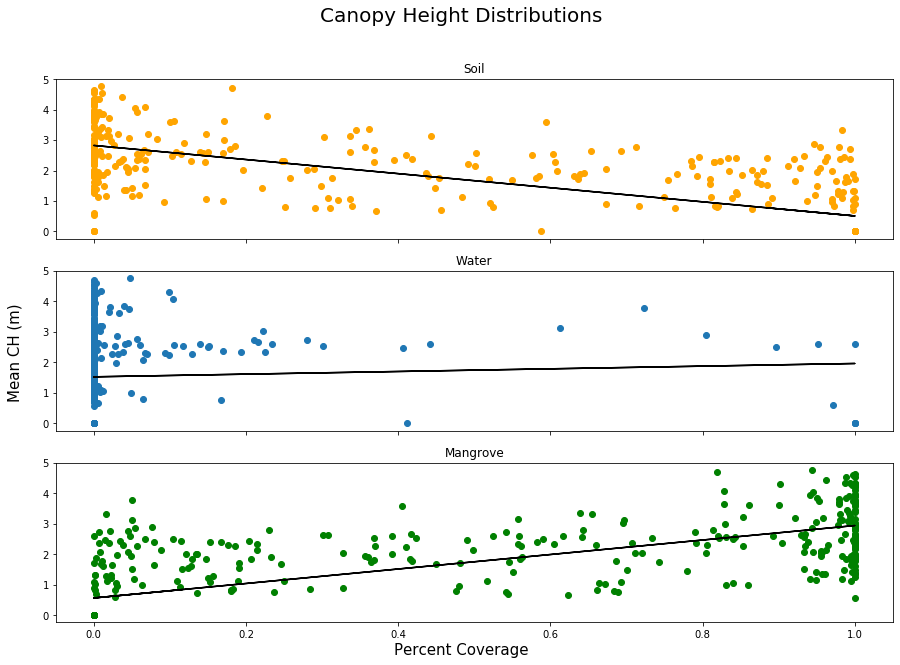

In [22]:
# making subplots
fig, axs = plt.subplots(3, figsize=(15, 10), sharex=True)
fig.suptitle('Canopy Height Distributions', fontsize=20)
fig.text(0.08, 0.5, 'Mean CH (m)', va='center', rotation='vertical', fontsize=15)
fig.text(0.5, 0.08, 'Percent Coverage', ha='center', fontsize=15)

per_soil = tot['s_area']/tot['total_area']
axs[0].plot(per_soil, tot['m_mean'], marker='o', ls='', color='orange')
m, b = np.polyfit(per_soil, tot['m_mean'], 1)
axs[0].plot(per_soil, (m*per_soil + b), color='black')
axs[0].title.set_text('Soil')

per_water = tot['w_area']/tot['total_area']
axs[1].plot(per_water, tot['m_mean'], marker='o', ls='')
m, b = np.polyfit(per_water, tot['m_mean'], 1)
axs[1].plot(per_water, (m*per_water + b), color='black')
axs[1].title.set_text('Water')

per_mangrove = tot['m_area']/tot['total_area']
axs[2].plot(per_mangrove, tot['m_mean'], marker='o', ls='', color='g')
m, b = np.polyfit(per_mangrove, tot['m_mean'], 1)
axs[2].plot(per_mangrove, (m*per_mangrove + b), color='black')
axs[2].title.set_text('Mangrove')

plt.savefig('/data/mangrove-data/Kathy/biomass_project/results/lap_07-18_site1/CH_wsm.png')

In [4]:
tot = pd.read_csv('/data/mangrove-data/Kathy/biomass_project/results/data/water-soil-mangrove-lap_07-18_site1.csv')
water = tot[tot['class_y'] == 'water']
nn = pd.read_csv('/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/water-soil-mangrove/nn_only.csv')
water_grids = water['FID_2']
list(nn.columns)
water_nn = nn[nn['origin'].isin(water_grids)]
# get only unique grids
count=0
for col in water_nn:
    if count == 0:
        uniq = water_nn[col].unique()
    else:
        temp = water_nn[col].unique()
        uniq = np.append(uniq, temp)
    count+=1
# uniq is the list of all mangrove grids that are next to water, regardless whether they have mangrove in them or not
uniq = uniq.astype(int)

In [8]:
# get 
water_nn

,origin,n1,n2,n3,n4,n5,n6,n7,n8
60,60,35,34,33,86.0,85.0,59.0,87.0,61.0
79,79,54,53,52,80.0,78.0,106.0,105.0,104.0
80,80,54,53,79,106.0,105.0,55.0,81.0,107.0
81,81,54,80,106,56.0,55.0,82.0,108.0,107.0
83,83,58,57,56,84.0,82.0,109.0,108.0,110.0
...,...,...,...,...,...,...,...,...,...
516,516,515,517,489,490.0,491.0,542.0,541.0,543.0
524,524,499,549,523,497.0,551.0,525.0,550.0,498.0
525,525,500,499,551,550.0,524.0,498.0,552.0,526.0
526,526,501,500,499,551.0,525.0,553.0,527.0,552.0


In [20]:
for row in water_nn.iterrows():
    print(row)

(60, origin    60.0
n1        35.0
n2        34.0
n3        33.0
n4        86.0
n5        85.0
n6        59.0
n7        87.0
n8        61.0
Name: 60, dtype: float64)
(79, origin     79.0
n1         54.0
n2         53.0
n3         52.0
n4         80.0
n5         78.0
n6        106.0
n7        105.0
n8        104.0
Name: 79, dtype: float64)
(80, origin     80.0
n1         54.0
n2         53.0
n3         79.0
n4        106.0
n5        105.0
n6         55.0
n7         81.0
n8        107.0
Name: 80, dtype: float64)
(81, origin     81.0
n1         54.0
n2         80.0
n3        106.0
n4         56.0
n5         55.0
n6         82.0
n7        108.0
n8        107.0
Name: 81, dtype: float64)
(83, origin     83.0
n1         58.0
n2         57.0
n3         56.0
n4         84.0
n5         82.0
n6        109.0
n7        108.0
n8        110.0
Name: 83, dtype: float64)
(84, origin     84.0
n1         58.0
n2         57.0
n3         83.0
n4        109.0
n5        110.0
n6        111.0
n7         85.0
n

In [21]:
tot['water_nn'] = 0
tot['water_nn'] = 

,Unnamed: 0,FID_2,class_x,m_min,m_max,m_mean,m_area,m_count,class_y,w_min,...,w_count,class,s_min,s_max,s_mean,s_area,s_count,total_area,total_count,water_nn
0,0,0,mangrove,0.870083,3.249431,1.529529,102.49637,95791.0,0,0.0,...,0.0,soil,0.705757,3.172526,1.249768,784.93916,733588.0,887.43553,829379.0,0
1,1,7,mangrove,1.095088,1.497829,1.310884,1.13634,1062.0,0,0.0,...,0.0,soil,0.891745,1.484788,1.063568,892.43778,834054.0,893.57412,835116.0,0
2,2,10,mangrove,0.834906,1.528462,1.113656,13.73131,12833.0,0,0.0,...,0.0,soil,0.423571,1.511579,0.926206,776.73226,725918.0,790.46357,738751.0,0
3,3,11,mangrove,0.793998,1.700238,1.184348,16.76690,15670.0,0,0.0,...,0.0,soil,0.305161,1.819894,1.128422,303.73769,283867.0,320.50459,299537.0,0
4,4,26,mangrove,1.188434,2.930737,1.674062,401.96476,375668.0,0,0.0,...,0.0,soil,1.022567,4.690773,1.629708,491.58796,459428.0,893.55272,835096.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,443,529,0,0.000000,0.000000,0.000000,0.00000,0.0,0,0.0,...,0.0,soil,0.491213,2.163723,1.351975,717.78061,670823.0,717.78061,670823.0,0
444,444,530,0,0.000000,0.000000,0.000000,0.00000,0.0,0,0.0,...,0.0,soil,0.147231,2.548160,1.220427,117.66041,109963.0,117.66041,109963.0,0
445,445,550,0,0.000000,0.000000,0.000000,0.00000,0.0,0,0.0,...,0.0,soil,1.453039,1.635391,1.564616,74.26121,69403.0,74.26121,69403.0,0
446,446,554,0,0.000000,0.000000,0.000000,0.00000,0.0,0,0.0,...,0.0,soil,0.169988,2.337379,1.426954,853.82041,797963.0,853.82041,797963.0,0


In [21]:
# find nearest neighbors to water
water = tot[tot['class_y'] == 'water']
# need to be able to calculate grid length later, use manually found one first
grid_len = 26
# get FID_2s of NNs
nn_FID2 = []
# for all FID_2s in water, do FID_2 +/- grid_len and FID_2 +/- 1
# edge cases for edge of grids, how to account for these?
# find polygons that are near water
nn_water = pd.DataFrame()
nn_water['']

23      60
31      79
32      80
33      81
35      83
      ... 
295    488
296    489
297    490
298    491
299    516
Name: FID_2, Length: 83, dtype: int64

In [15]:
tot[(tot['class_y'] == 'water') & (tot['class_x'] == 'mangrove')]

,Unnamed: 0,FID_2,class_x,m_min,m_max,m_mean,m_area,m_count,class_y,w_min,...,w_area,w_count,class,s_min,s_max,s_mean,s_area,s_count,total_area,total_count
23,23,60,mangrove,0.714191,4.131826,2.135208,859.78245,803535.0,water,0.667592,...,8.42304,7872.0,soil,0.701131,3.557845,1.948451,25.38040,23720.0,893.58589,835127.0
31,31,79,mangrove,1.329569,4.678662,2.564132,752.75463,703509.0,water,1.123618,...,12.49760,11680.0,soil,1.094317,3.118872,1.282105,128.31119,119917.0,893.56342,835106.0
32,32,80,mangrove,1.173165,4.014720,2.352431,632.54762,591166.0,water,0.949910,...,201.37400,188200.0,soil,1.039390,2.480067,1.375125,59.66641,55763.0,893.58803,835129.0
33,33,81,mangrove,1.075921,5.134941,2.303581,719.55253,672479.0,water,0.945381,...,60.12758,56194.0,soil,1.050844,4.123108,1.860094,113.82981,106383.0,893.50992,835056.0
35,35,83,mangrove,1.167413,5.365016,3.060366,848.62235,793105.0,water,1.187394,...,3.61018,3374.0,soil,1.162565,4.132761,2.185109,41.31912,38616.0,893.55165,835095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,286,501,mangrove,1.537007,4.061866,2.780467,206.19970,192710.0,water,1.485237,...,50.95875,47625.0,soil,1.460504,3.479274,1.599288,636.39427,594761.0,893.55272,835096.0
288,288,524,mangrove,1.225554,3.949376,2.403492,134.54822,125746.0,water,1.724593,...,3.86805,3615.0,soil,1.437679,3.356898,1.633767,745.56423,696789.0,883.98050,826150.0
289,289,525,mangrove,1.387411,4.476360,2.603727,550.61023,514589.0,water,1.587016,...,209.47497,195771.0,soil,1.511062,2.909546,1.622569,133.49320,124760.0,893.57840,835120.0
290,290,526,mangrove,1.036016,4.388756,2.613282,468.33151,437693.0,water,1.408459,...,124.20667,116081.0,soil,1.424777,3.667100,1.650200,301.01561,281323.0,893.55379,835097.0


In [66]:
#large = valid_drone[valid_drone['area'] >= 800]
gdf = gpd.GeoDataFrame(w_valid_drone, crs="EPSG:4326", geometry=w_valid_drone.geometry)
gdf.crs = {'init': 'epsg:4326'}
gdf
gdf.to_file("/data/mangrove-data/Kathy/biomass_project/downsampling/lap_07-18_site1/test_water")

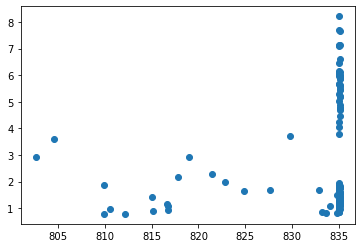

In [191]:
plt.plot(large['area'], large['mean'], marker='o', ls='')